In [2]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

from pandas import Series, DataFrame
import pandas as pd

HR_df = pd.read_csv('DSP_Project_Data.csv')

HR_df

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0


In [3]:
# drop rows with mssing values, most rows do not have NA values
HR_df.dropna(inplace=True)

# change attrition to numerical
attrition_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the 'Attrition' column
HR_df['Attrition'] = HR_df['Attrition'].map(attrition_mapping)
HR_df

# apply mapping to the 'Gender' column 
gender_mapping = {'Male': 1, 'Female': 0}
HR_df['Gender'] = HR_df['Gender'].map(gender_mapping)
#HR_df

# droppping some columns that we think are not important/not variables of interest
HR_df.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeID'], axis=1, inplace=True)


In [17]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   int64  
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   Gender                   4300 non-null   int64  
 8   JobLevel                 4300 non-null   int64  
 9   JobRole                  4300 non-null   object 
 10  MaritalStatus            4300 non-null   object 
 11  MonthlyIncome            4300 non-null   int64  
 12  NumCompaniesWorked       4300 non-null   float64
 13  PercentSalaryHike        4300 non-null   int64  
 14  StockOptionLevel        

# Classification Tree model

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
HR_df['Attrition'] = label_encoder.fit_transform(HR_df['Attrition'])

# Separating the predictor variables and target variable
X = HR_df.drop(columns=['Attrition'])
y = HR_df['Attrition']

# Transforming the character variables
cat_columns = X.select_dtypes(include=['object']).columns
for col in cat_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the classification tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9872093023255814


Descriptive Statistics for Numerical Variables:
               Age  DistanceFromHome    Education     JobLevel  MonthlyIncome  \
count  4300.000000       4300.000000  4300.000000  4300.000000    4300.000000   
mean     36.926977          9.197907     2.913256     2.066977   65059.844186   
std       9.146517          8.097059     1.024774     1.106633   47045.398914   
min      18.000000          1.000000     1.000000     1.000000   10090.000000   
25%      30.000000          2.000000     2.000000     1.000000   29260.000000   
50%      36.000000          7.000000     3.000000     2.000000   49360.000000   
75%      43.000000         14.000000     4.000000     3.000000   83802.500000   
max      60.000000         29.000000     5.000000     5.000000  199990.000000   

       NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count         4300.000000        4300.000000       4300.000000   
mean             2.690000          15.210698          0.795349   
std              2.49576

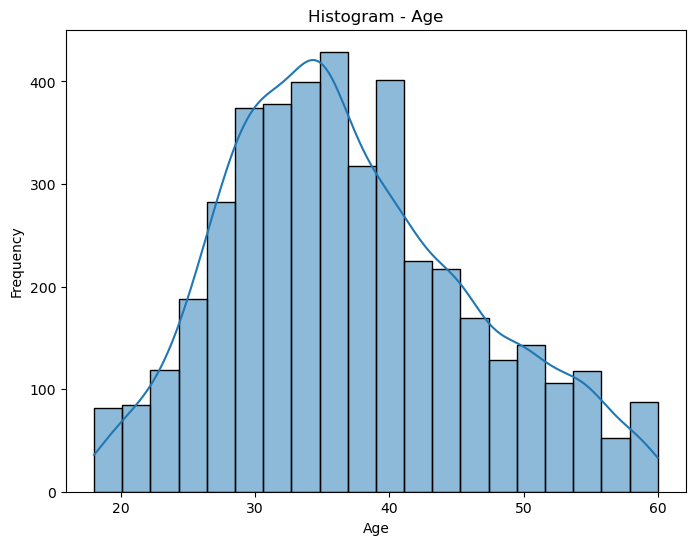

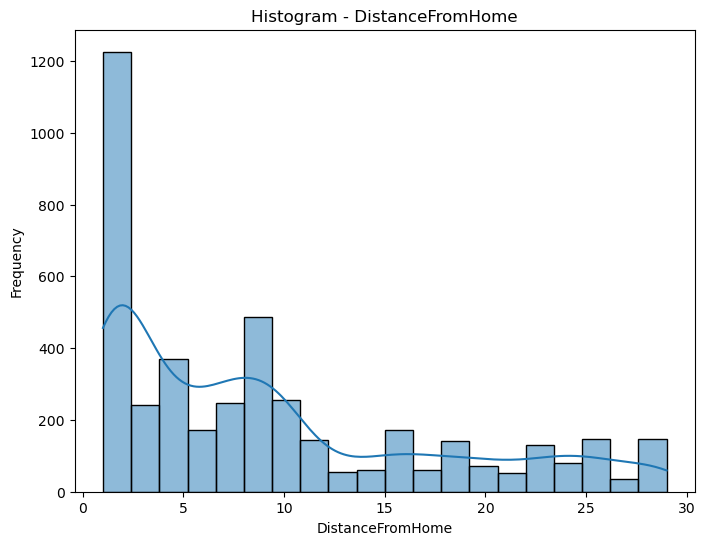

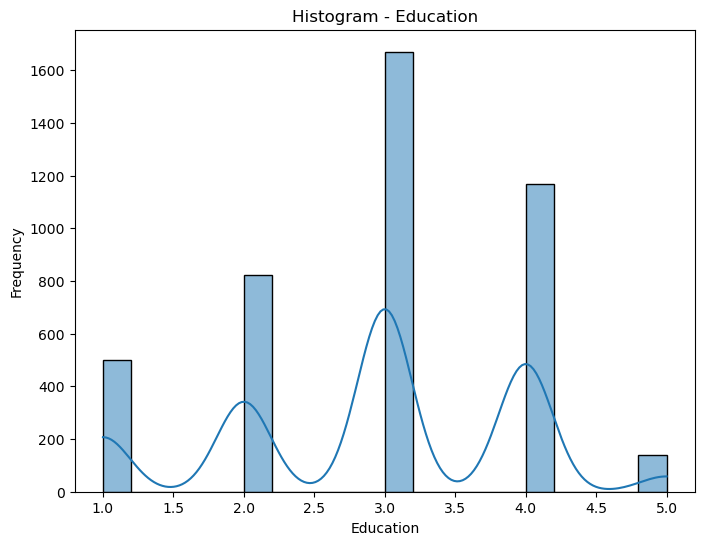

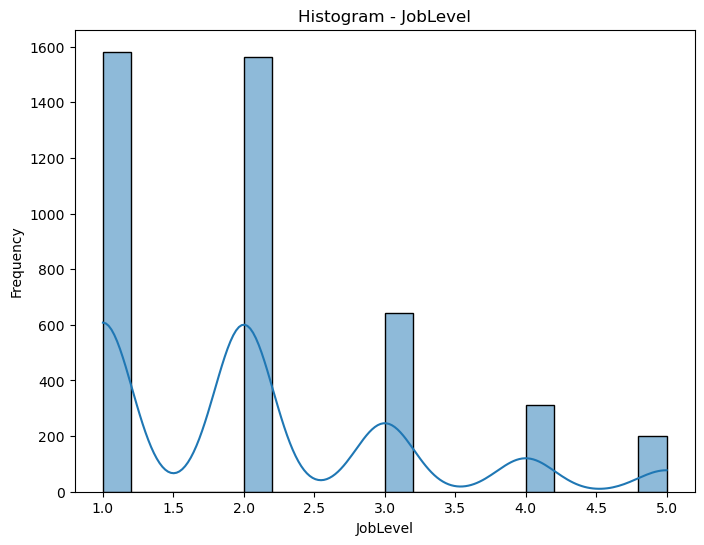

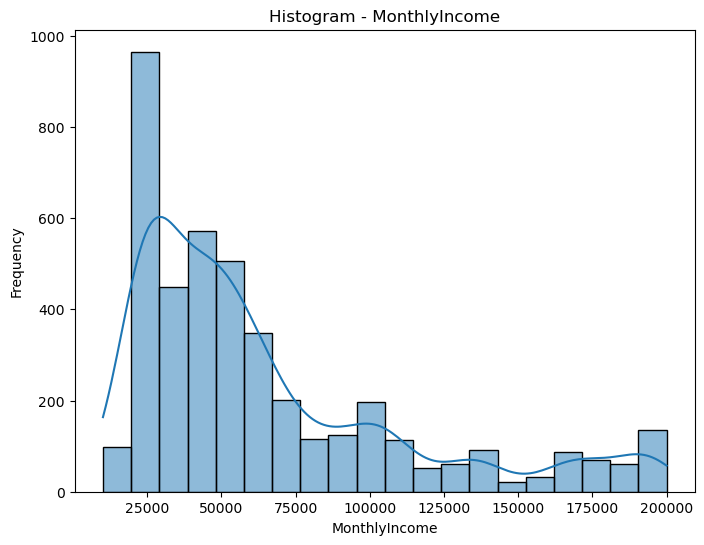

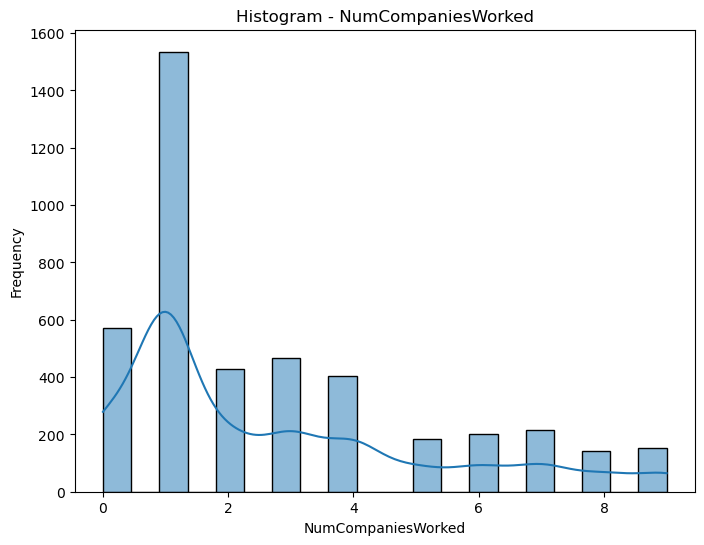

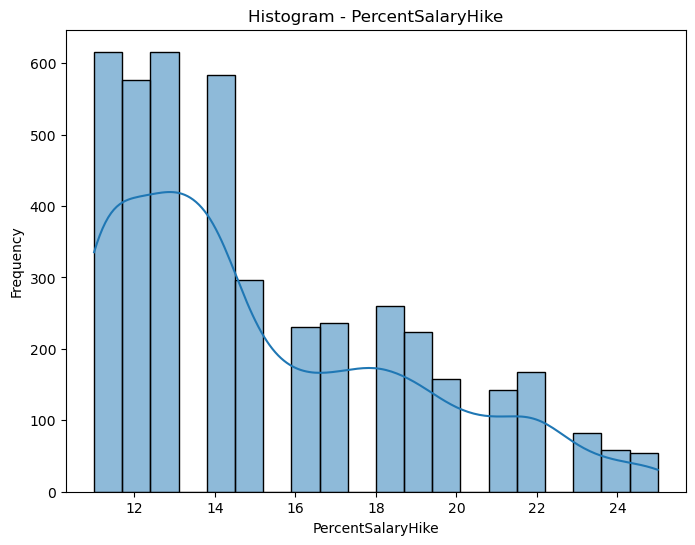

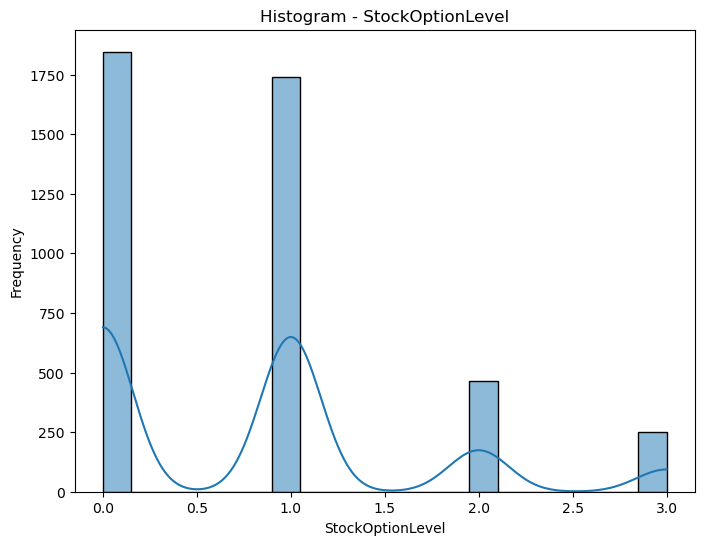

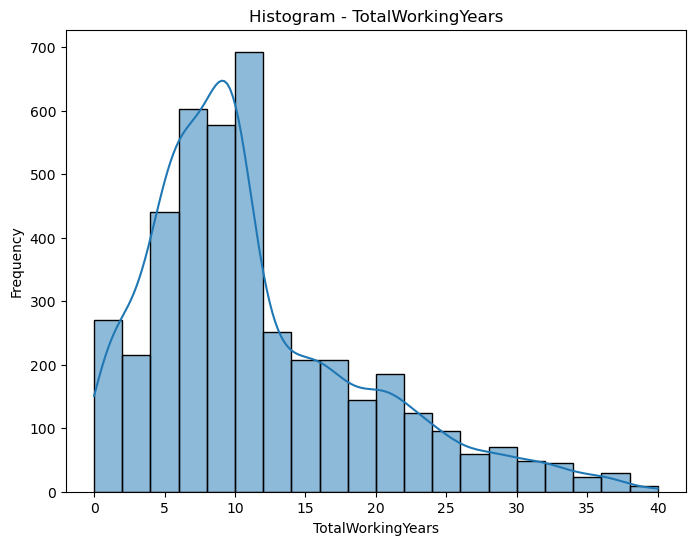

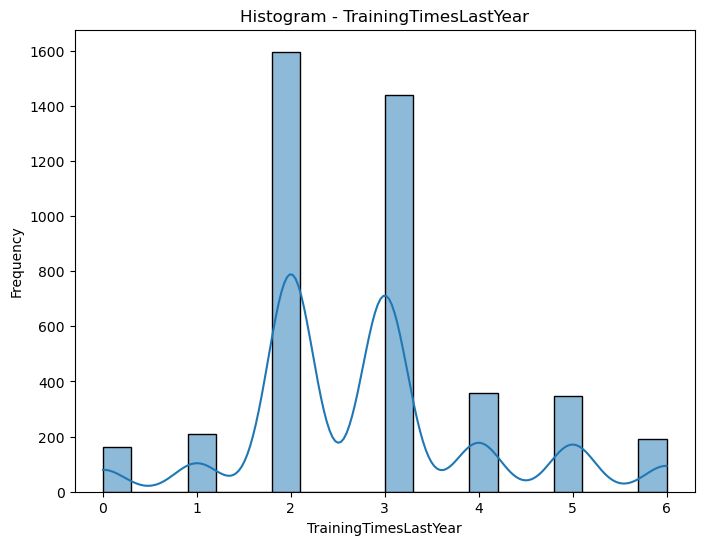

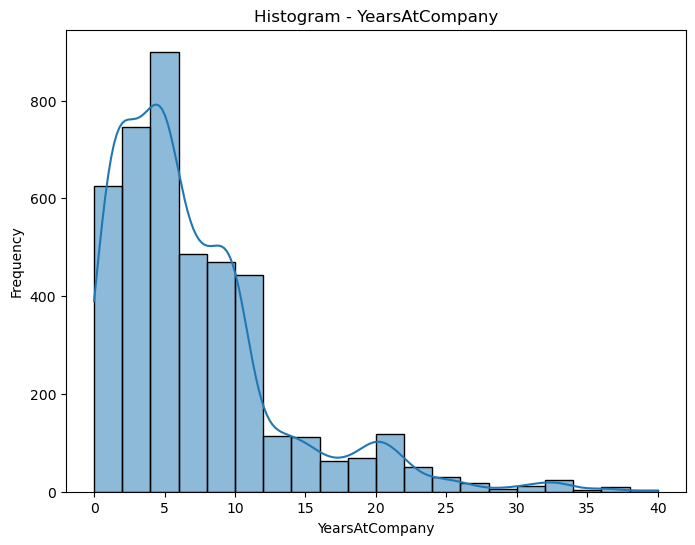

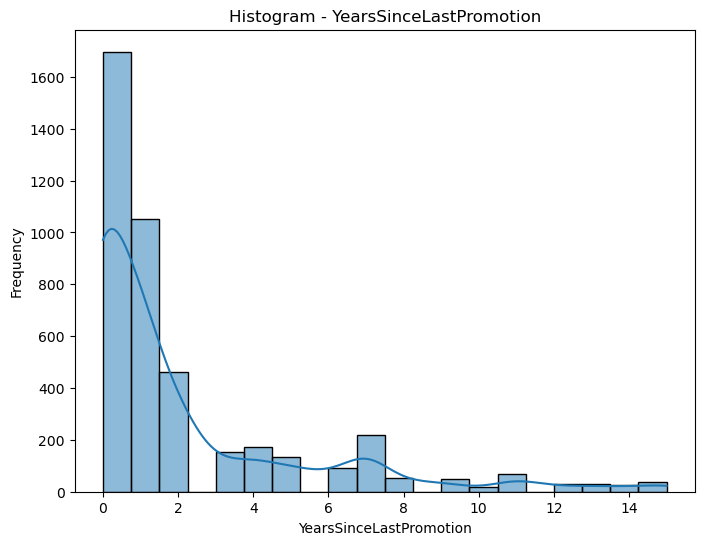

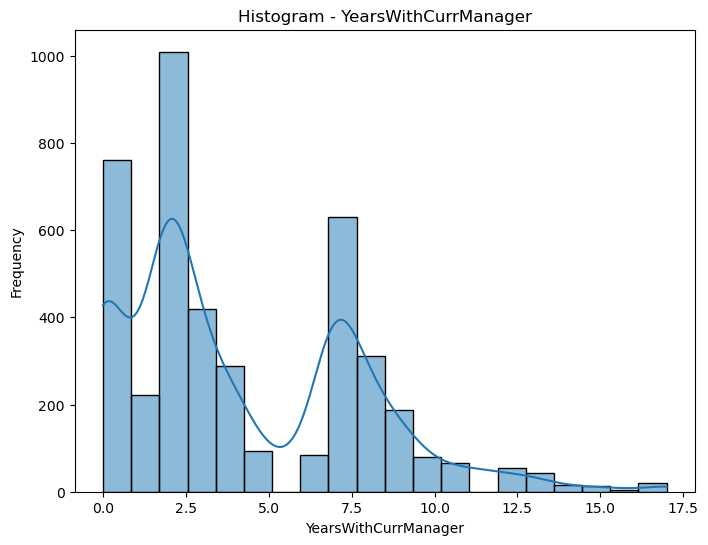

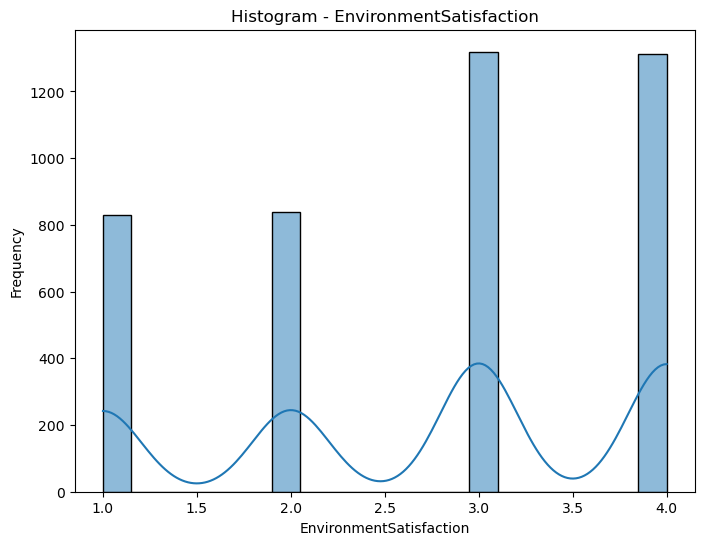

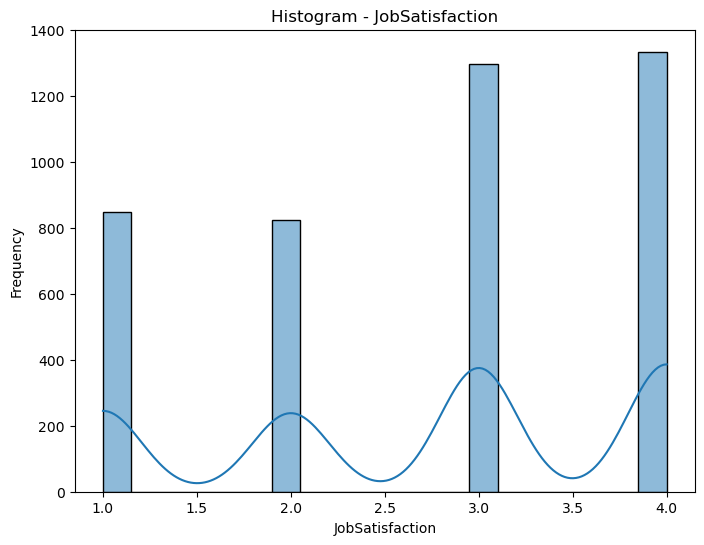

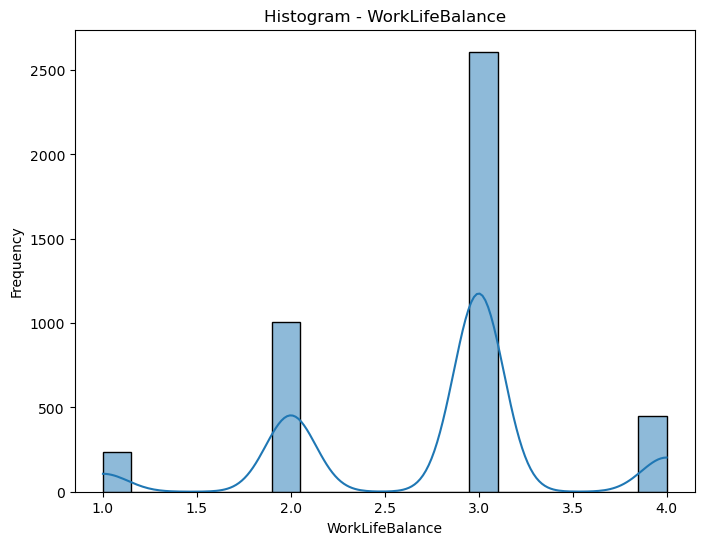

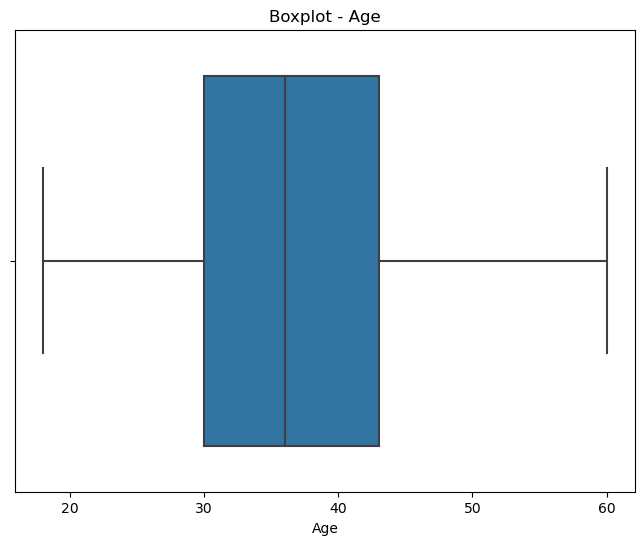

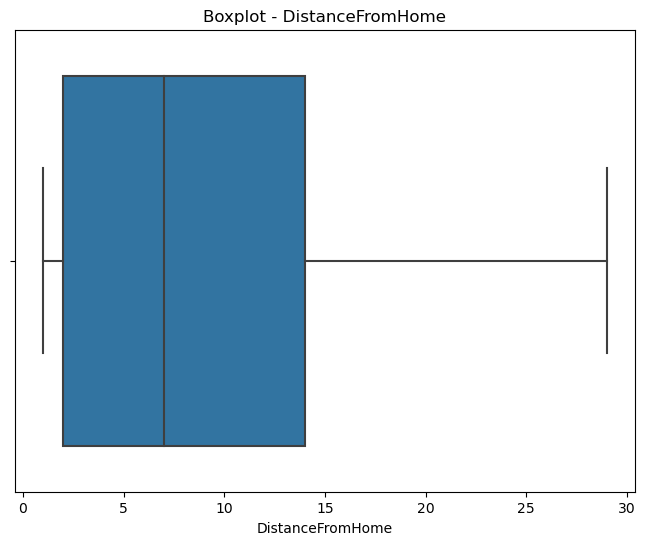

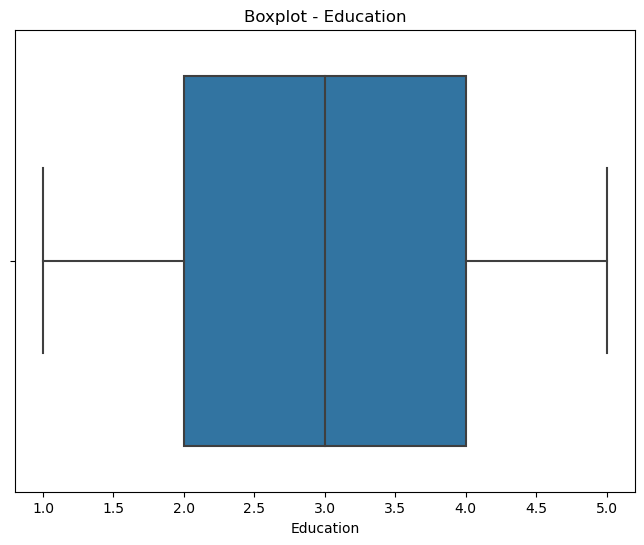

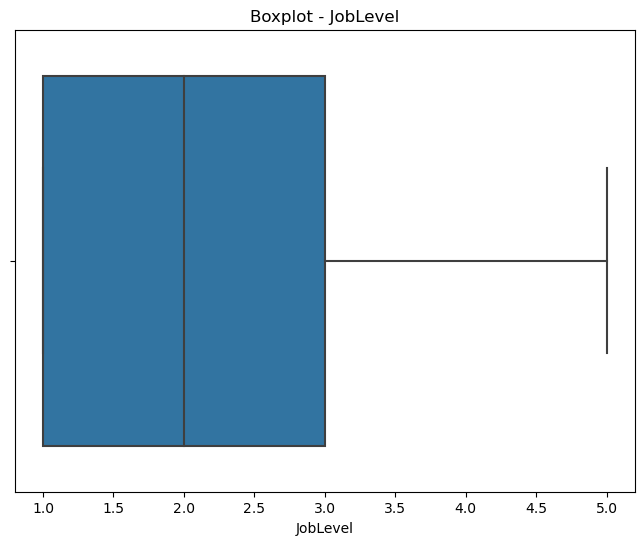

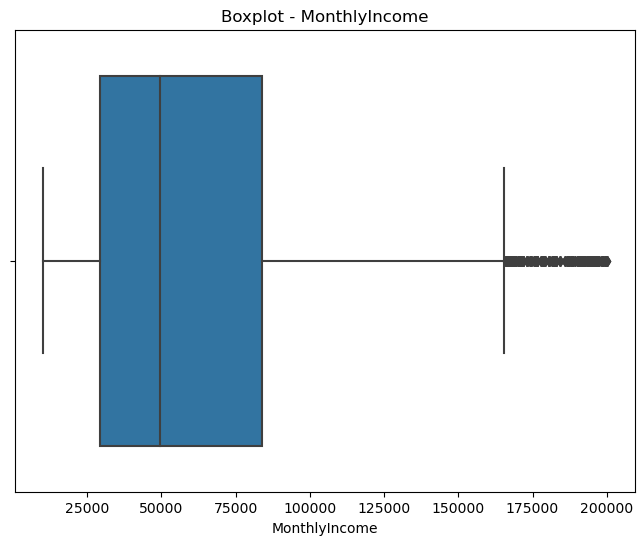

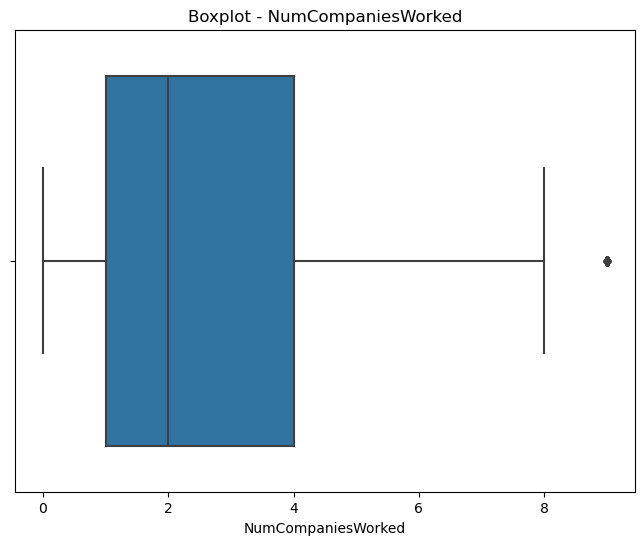

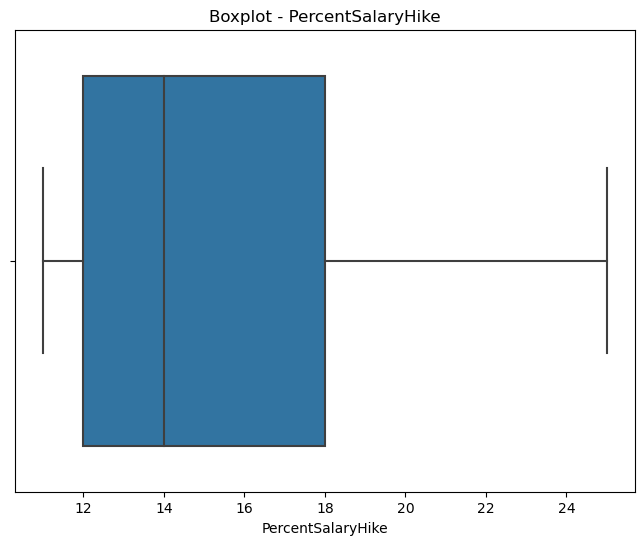

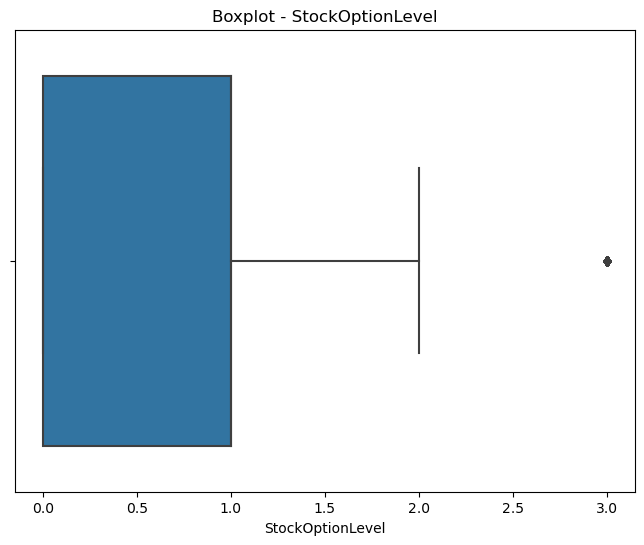

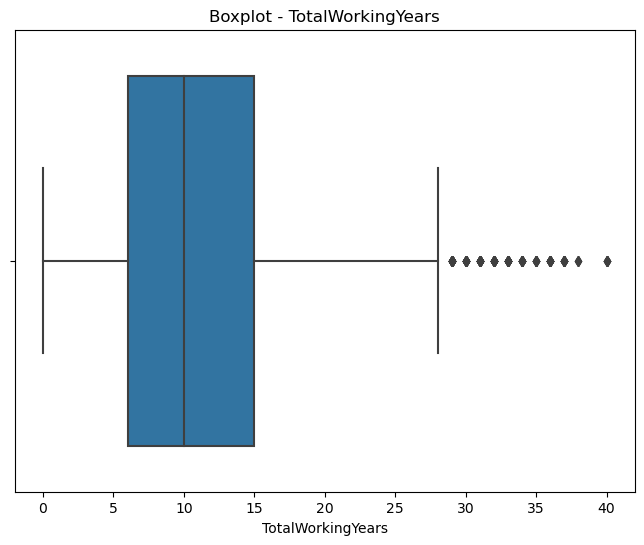

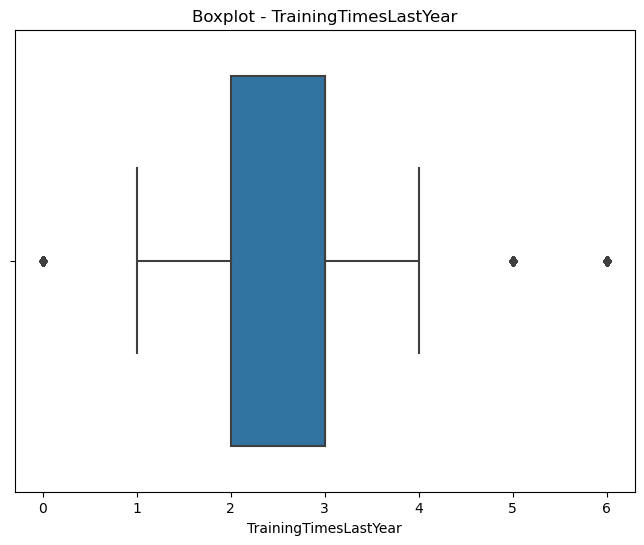

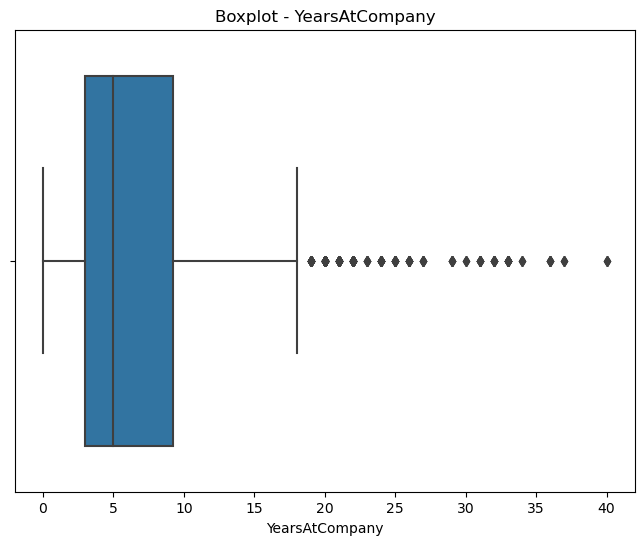

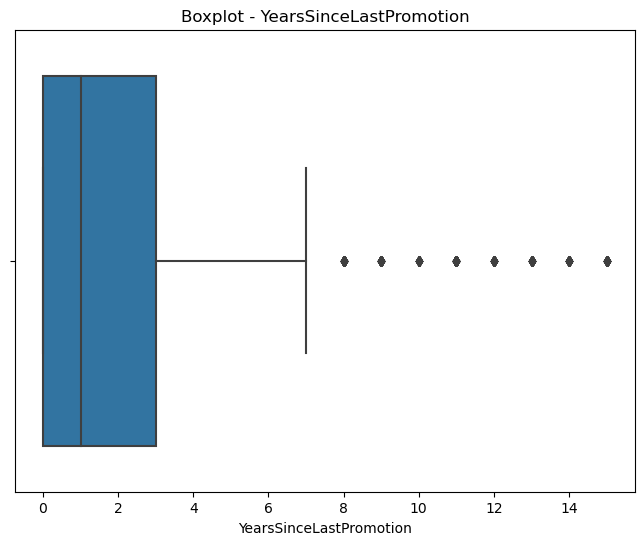

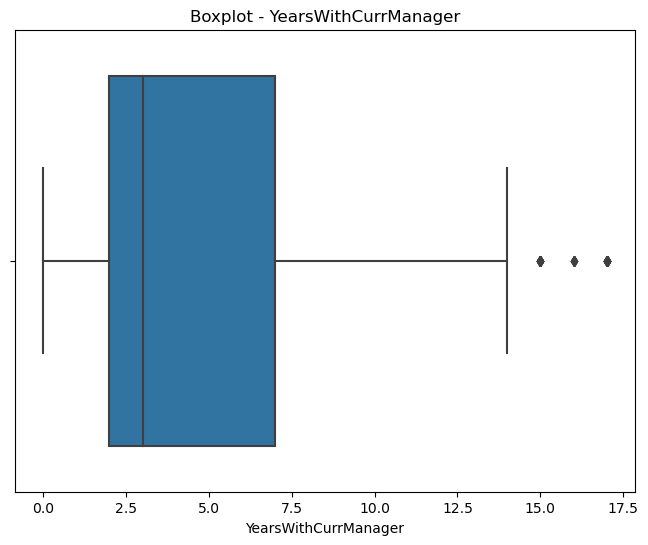

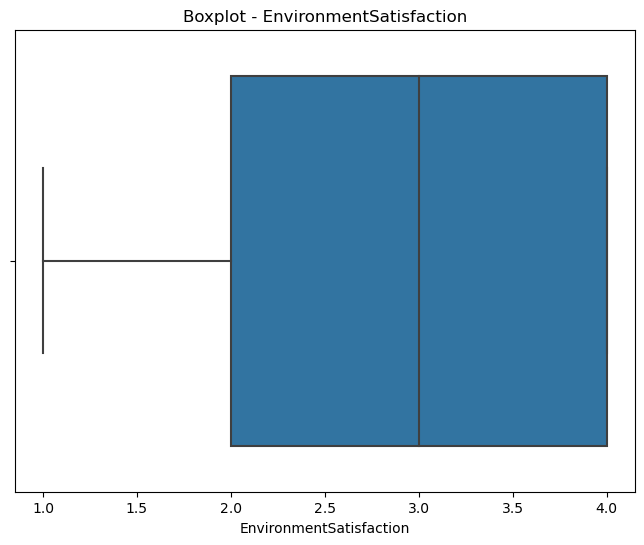

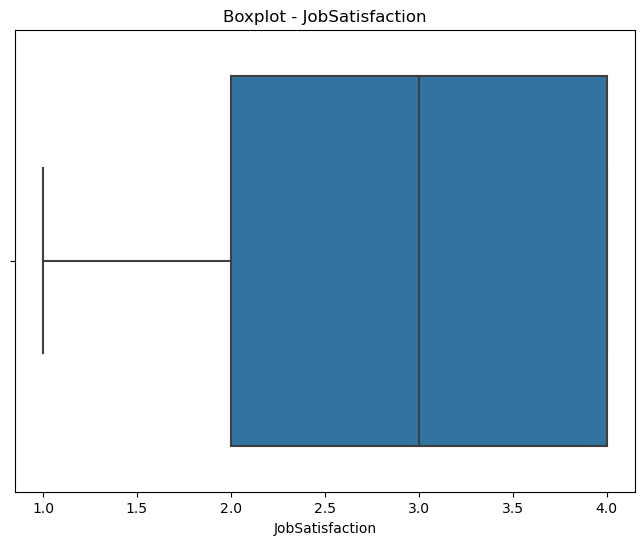

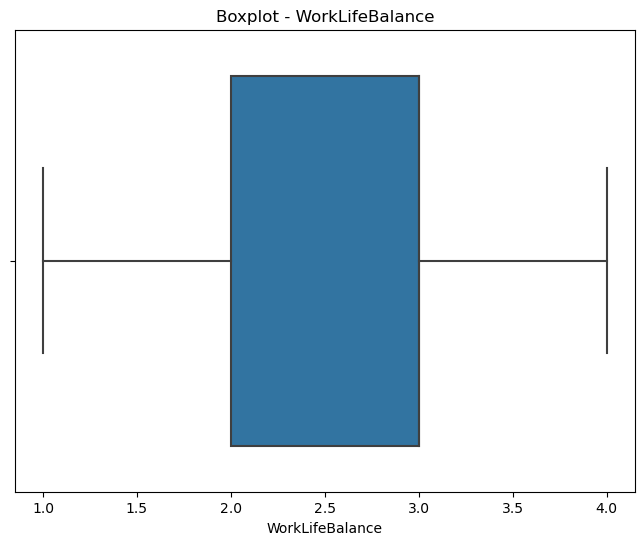

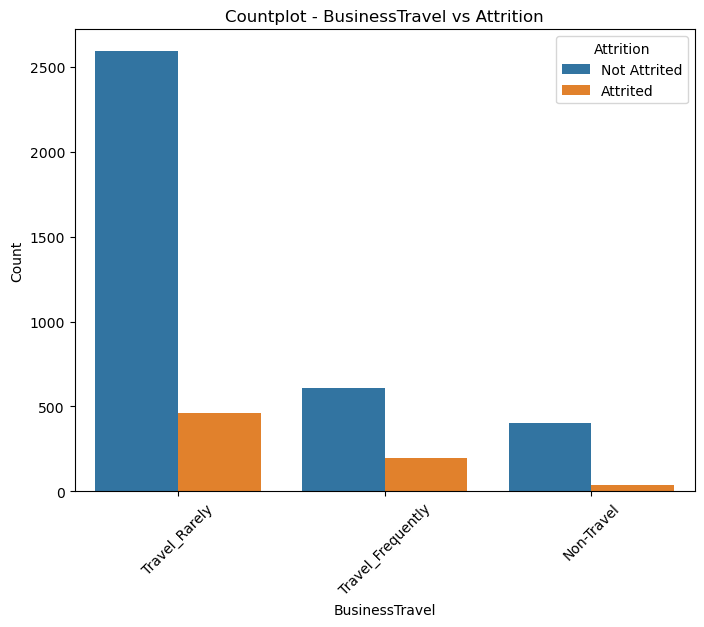

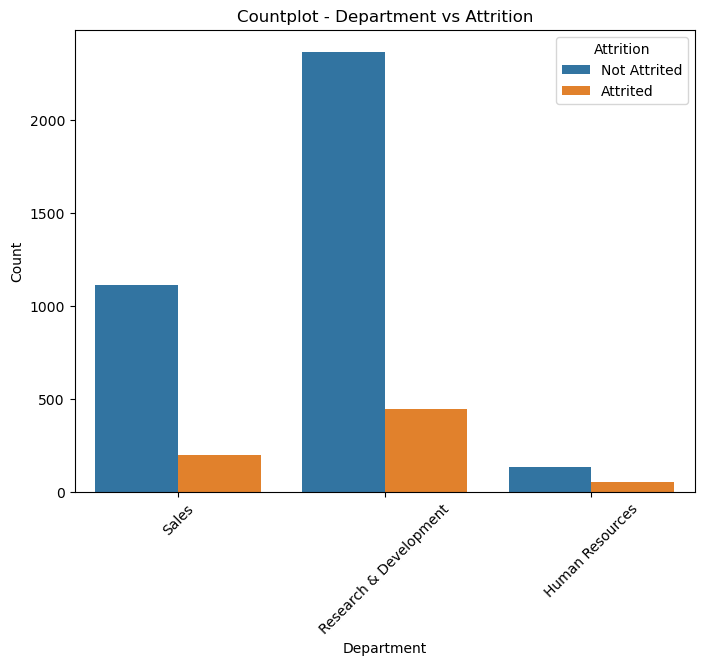

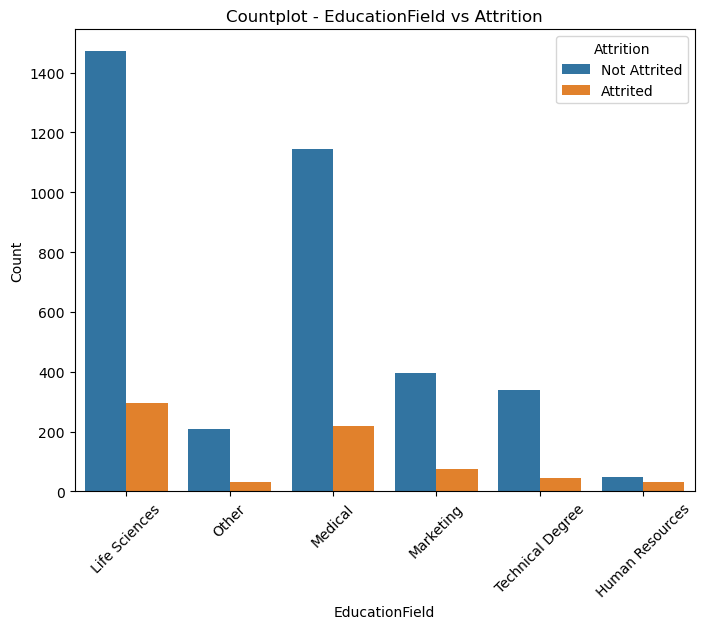

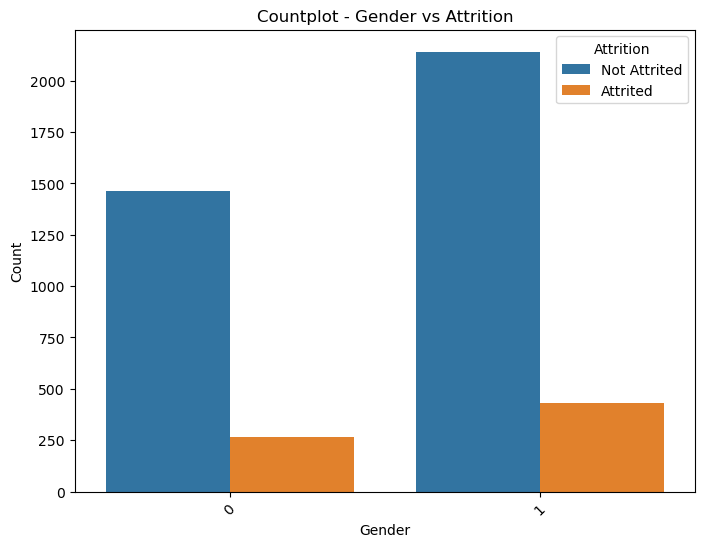

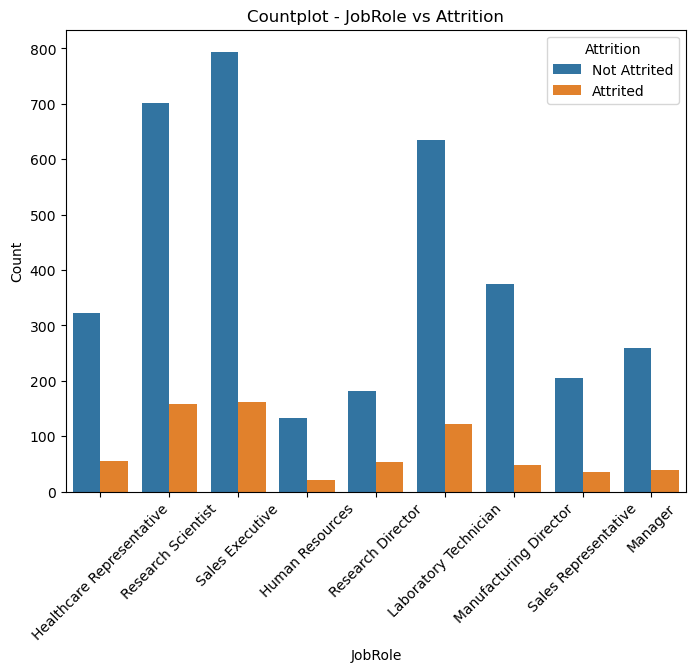

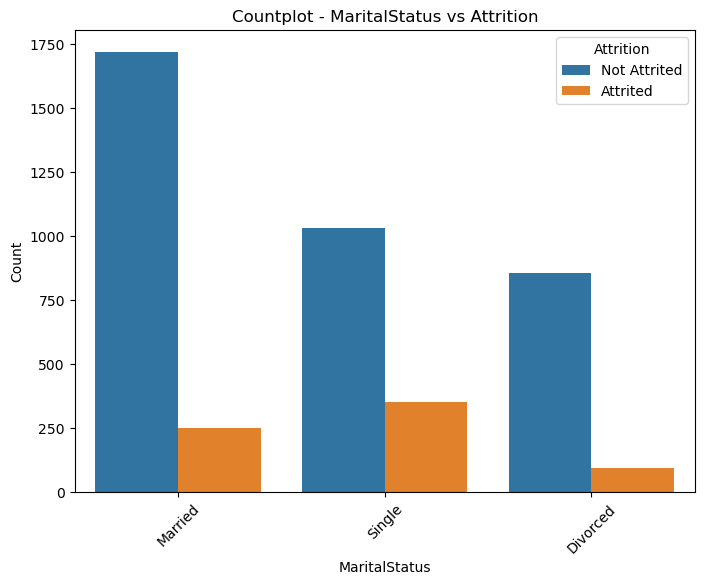

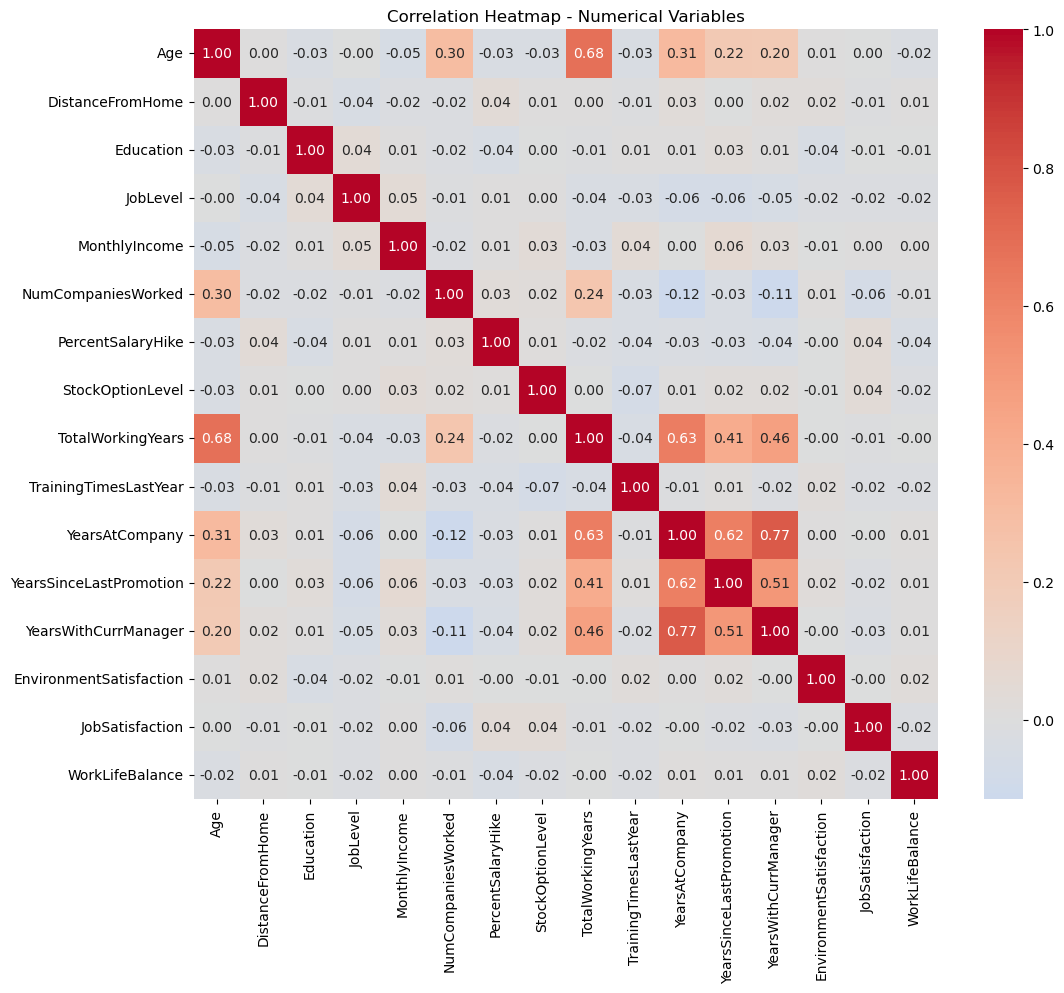

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining target and predictor variables
target_variable = 'Attrition'
predictor_variables = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
                       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
                       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction',
                       'JobSatisfaction', 'WorkLifeBalance']

# EDA for Numerical Variables
numerical_variables = ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
                       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction',
                       'JobSatisfaction', 'WorkLifeBalance']

# Descriptive Statistics for numerical variables
print("Descriptive Statistics for Numerical Variables:")
print(HR_df[numerical_variables].describe())

# Histograms for numerical variables
for col in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(HR_df[col], kde=True, bins=20)
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for numerical variables (to check for outliers)
for col in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=HR_df[col])
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)
    plt.show()

# EDA for Categorical Variables
categorical_variables = [col for col in predictor_variables if col not in numerical_variables]

# Countplot for categorical variables
for col in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue=target_variable, data=HR_df)
    plt.title(f'Countplot - {col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title=target_variable, loc='upper right', labels=['Not Attrited', 'Attrited'])
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap for numerical variables
correlation_matrix = HR_df[numerical_variables].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title("Correlation Heatmap - Numerical Variables")
plt.show()


In [8]:
# Adding a section for Cross-validation

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  # Add this import statement


label_encoder = LabelEncoder()
HR_df['Attrition'] = label_encoder.fit_transform(HR_df['Attrition'])

# Separating the predictor variables and target variable
X = HR_df.drop(columns=['Attrition'])
y = HR_df['Attrition']

# Transforming the character variables
cat_columns = X.select_dtypes(include=['object']).columns
for col in cat_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the classification tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy_test)

# Calculating the accuracy using cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
mean_cv_accuracy = cv_scores.mean()
print("Accuracy using cross-validation:", mean_cv_accuracy)

# 70% - 30% Train -Test:
# Accuracy on test : 0.9697
# Accuracy using CV : 0.9993

# 80% - 20% Train -Test:
# Accuracy on test : 0.9872
# Accuracy using CV : 0.9993

# Determining feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)



Accuracy on the test set: 0.9872093023255814
Accuracy using cross-validation: 0.9993023255813954

Feature Importance:
                    Feature  Importance
14        TotalWorkingYears    0.105924
10            MonthlyIncome    0.100363
0                       Age    0.085417
12        PercentSalaryHike    0.071605
17  YearsSinceLastPromotion    0.057840
3          DistanceFromHome    0.049705
8                   JobRole    0.049133
16           YearsAtCompany    0.047790
5            EducationField    0.047654
15    TrainingTimesLastYear    0.045415
11       NumCompaniesWorked    0.040020
19  EnvironmentSatisfaction    0.039647
20          JobSatisfaction    0.038142
21          WorkLifeBalance    0.036684
9             MaritalStatus    0.035183
4                 Education    0.033501
18     YearsWithCurrManager    0.029488
1            BusinessTravel    0.028398
13         StockOptionLevel    0.020661
2                Department    0.017197
7                  JobLevel    0.015208
6 